# 💻 About this notebook

This academic-oriented notebook was created to perform tests across different CNN models, aiming to study and discuss their performance in solving an image classification problem.

**PlantVillage** dataset: https://data.mendeley.com/datasets/tywbtsjrjv/1

### 💬 What will be discussed here?
The notebook is divided into sections based on the different models tested to solve a multi-class classification problem.

* At the beginning of each model section, there will be a brief introduction.
* The script will be presented in a logical manner, including any adjustments made (if applicable), and performance graphs.
* In the end, based on the collected data, the model chosen for Verdant's API will be presented.



## 📚 Get Started


In [ ]:
# Necessary libraries
import tensorflow as tf
import zipfile
import os
import shutil
import pathlib
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import seaborn as sns
import cv2

# TensorFlow Keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, BatchNormalization, Activation, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# TensorFlow version
print(tf.__version__)

2.18.0


In [ ]:
# Dataset download
!wget https://data.mendeley.com/public-files/datasets/tywbtsjrjv/files/b4e3a32f-c0bd-4060-81e9-6144231f2520/file_downloaded

# Unzip the file
zip_ref = zipfile.ZipFile("file_downloaded")
zip_ref.extractall()
zip_ref.close()

--2025-05-09 22:05:03--  https://data.mendeley.com/public-files/datasets/tywbtsjrjv/files/b4e3a32f-c0bd-4060-81e9-6144231f2520/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.133.86, 162.159.130.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.133.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/349ac012-2948-4172-bbba-3bf8f76596fd [following]
--2025-05-09 22:05:03--  https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/349ac012-2948-4172-bbba-3bf8f76596fd
Resolving prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)... 3.5.67.40, 3.5.67.174, 52.218.117.98, ...
Connecting to prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)|3.5.67.40|:443... con

In [ ]:
dataset_path = pathlib.Path("Plant_leave_diseases_dataset_with_augmentation/")

## 🔎 Inspect the data

In [ ]:
# Directories
!ls Plant_leave_diseases_dataset_with_augmentation/

 Apple___Apple_scab
 Apple___Black_rot
 Apple___Cedar_apple_rust
 Apple___healthy
 Background_without_leaves
 Blueberry___healthy
 Cherry___healthy
 Cherry___Powdery_mildew
'Corn___Cercospora_leaf_spot Gray_leaf_spot'
 Corn___Common_rust
 Corn___healthy
 Corn___Northern_Leaf_Blight
 Grape___Black_rot
'Grape___Esca_(Black_Measles)'
 Grape___healthy
'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'
'Orange___Haunglongbing_(Citrus_greening)'
 Peach___Bacterial_spot
 Peach___healthy
 Pepper,_bell___Bacterial_spot
 Pepper,_bell___healthy
 Potato___Early_blight
 Potato___healthy
 Potato___Late_blight
 Raspberry___healthy
 Soybean___healthy
 Squash___Powdery_mildew
 Strawberry___healthy
 Strawberry___Leaf_scorch
 Tomato___Bacterial_spot
 Tomato___Early_blight
 Tomato___healthy
 Tomato___Late_blight
 Tomato___Leaf_Mold
 Tomato___Septoria_leaf_spot
'Tomato___Spider_mites Two-spotted_spider_mite'
 Tomato___Target_Spot
 Tomato___Tomato_mosaic_virus
 Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [ ]:
# Files from specific directory
!ls Plant_leave_diseases_dataset_with_augmentation/Potato___healthy/

'image (1000).JPG'  'image (325).JPG'  'image (550).JPG'  'image (776).JPG'
'image (100).JPG'   'image (326).JPG'  'image (551).JPG'  'image (777).JPG'
'image (101).JPG'   'image (327).JPG'  'image (552).JPG'  'image (778).JPG'
'image (102).JPG'   'image (328).JPG'  'image (553).JPG'  'image (779).JPG'
'image (103).JPG'   'image (329).JPG'  'image (554).JPG'  'image (77).JPG'
'image (104).JPG'   'image (32).JPG'   'image (555).JPG'  'image (780).JPG'
'image (105).JPG'   'image (330).JPG'  'image (556).JPG'  'image (781).JPG'
'image (106).JPG'   'image (331).JPG'  'image (557).JPG'  'image (782).JPG'
'image (107).JPG'   'image (332).JPG'  'image (558).JPG'  'image (783).JPG'
'image (108).JPG'   'image (333).JPG'  'image (559).JPG'  'image (784).JPG'
'image (109).JPG'   'image (334).JPG'  'image (55).JPG'   'image (785).JPG'
'image (10).JPG'    'image (335).JPG'  'image (560).JPG'  'image (786).JPG'
'image (110).JPG'   'image (336).JPG'  'image (561).JPG'  'image (787).JPG'
'image (111).

In [ ]:
# Check how many images are in each directory
total = 0

for dirpath, dirnames, filenames in os.walk("Plant_leave_diseases_dataset_with_augmentation"):
  total += len(filenames)
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

print(f"Total of {total} images.")

There are 39 directories and 0 images in 'Plant_leave_diseases_dataset_with_augmentation'.
There are 0 directories and 1000 images in 'Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_mosaic_virus'.
There are 0 directories and 1000 images in 'Plant_leave_diseases_dataset_with_augmentation/Tomato___Early_blight'.
There are 0 directories and 1000 images in 'Plant_leave_diseases_dataset_with_augmentation/Potato___Late_blight'.
There are 0 directories and 1591 images in 'Plant_leave_diseases_dataset_with_augmentation/Tomato___healthy'.
There are 0 directories and 1000 images in 'Plant_leave_diseases_dataset_with_augmentation/Grape___healthy'.
There are 0 directories and 5507 images in 'Plant_leave_diseases_dataset_with_augmentation/Orange___Haunglongbing_(Citrus_greening)'.
There are 0 directories and 1076 images in 'Plant_leave_diseases_dataset_with_augmentation/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'.
There are 0 directories and 1162 images in 'Plant_leave_diseases_data

Image shape: (204, 204, 3)


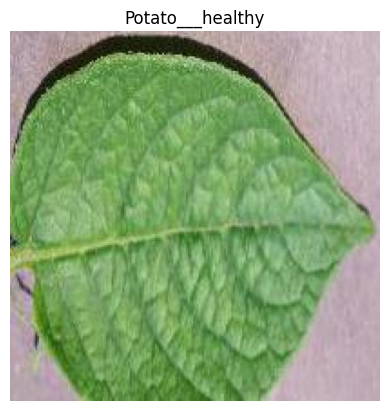

In [ ]:
# Randomly view an image from a dataset directory
def view_random_image(target_dir, target_class):
    """
    Selects and displays a random image from the specified class folder.

    Parameters:
    target_dir (str): Path to the dataset directory.
    target_class (str): Name of the class subdirectory to sample from.

    Returns:
    ndarray: The randomly selected image as an array.
    """

    # Set target folder path
    target_folder = target_dir + target_class

    # Get a random image file path from the target folder
    random_image = random.sample(os.listdir(target_folder), 1)

    # Read and display the image
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")

    return img

# Example usage
img = view_random_image("Plant_leave_diseases_dataset_with_augmentation/", "Potato___healthy")

## ❗Environment preparation


In [ ]:
# List of classes of study interest
study_classes = ["Potato___Early_blight", "Potato___healthy", "Potato___Late_blight"]

> 🔑 **Note:** The PlantVillage dataset has several images (a total of more than 60,000) associated with their respective classes. However, for practical purposes, the scope will be reduced, making model training easier.



In [ ]:
# Excluding other classes
for dirname in os.listdir(dataset_path):

  dirpath = os.path.join(dataset_path, dirname)

  if os.path.isdir(dirpath) and dirname not in study_classes:
    shutil.rmtree(dirpath)
    print(f"Pasta {dirpath} removida!")

class_names = np.array(sorted([item.name for item in dataset_path.glob('*')]))
print(f"\nClasses atuais: ", class_names)


Classes atuais:  ['Potato___Early_blight' 'Potato___Late_blight' 'Potato___healthy']


In [ ]:
# Load our images

img_size = (224, 224)
batch_size = 32

# Loading training set (80% of images)
train_data = tf.keras.preprocessing.image_dataset_from_directory(dataset_path,
                                                                 validation_split=0.2,
                                                                 subset="training",
                                                                 seed=36,
                                                                 label_mode="categorical",
                                                                 image_size=img_size,
                                                                 batch_size=batch_size
                                                                 )

# Loading validation set (20% of images)
val_data = tf.keras.preprocessing.image_dataset_from_directory(dataset_path,
                                                               validation_split=0.2,
                                                               subset="validation",
                                                               seed=36,
                                                               label_mode="categorical",
                                                               image_size=img_size,
                                                               batch_size=batch_size
                                                               )

Found 3000 files belonging to 3 classes.
Using 2400 files for training.
Found 3000 files belonging to 3 classes.
Using 600 files for validation.


In [ ]:
# Normalization layer
normalization_layer = tf.keras.layers.Rescaling(1./255)

# Normalize data
train_data = train_data.map(lambda x, y: (normalization_layer(x), y))
val_data = val_data.map(lambda x, y: (normalization_layer(x), y))

### Essentials

In [ ]:
# Function to load an image and resize it for model input
def load_and_prep_image(filename, img_shape=224):
    """
    Loads an image from a file, converts it to a tensor, centrally crops it,
    resizes it to (img_shape, img_shape), and normalizes pixel values.

    Parameters:
    filename (str): Path to the image file.
    img_shape (int): Desired width and height after resizing. Default is 224.

    Returns:
    tf.Tensor: Preprocessed image tensor.
    """

    # Read the image
    img = tf.io.read_file(filename)

    # Decode the image file into a tensor
    img = tf.image.decode_image(img)

    # Centrally crop the image to a square
    shape = tf.shape(img)
    height, width = shape[0], shape[1]
    crop_size = tf.minimum(height, width)

    offset_height = (height - crop_size) // 2
    offset_width = (width - crop_size) // 2
    img = tf.image.crop_to_bounding_box(img, offset_height, offset_width, crop_size, crop_size)

    # Resize the image to the desired shape
    img = tf.image.resize(img, size=[img_shape, img_shape])

    # Normalize the pixel values to the range [0, 1]
    img = img / 255.
    return img


In [ ]:
# Function to make a prediction with a model and plot the image
def pred_and_plot(model, filename, class_names):
    """
    Loads an image from filename, makes a prediction with the model,
    and plots the image with the predicted class as the title.

    Parameters:
    model (tf.keras.Model): Trained model for prediction.
    filename (str): Path to the image file.
    class_names (list): List of class names corresponding to model output.
    """

    # Load and preprocess the image
    img = load_and_prep_image(filename)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))

    # Determine predicted class
    if len(pred[0]) > 1:
        pred_class = class_names[tf.argmax(pred[0])]
    else:
        pred_class = class_names[int(tf.round(pred[0]))]

    # Plot the image with the predicted class
    plt.imshow(img)
    plt.title(f"Previsão: {pred_class}")
    plt.axis("off")
    plt.show()

In [ ]:
# Stop training when performance stops improving.
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,
    verbose=1,
    restore_best_weights=True
)

# Reduces the learning rate when performance stagnates.
reduce_lr = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.2,
    patience=3,
    verbose=1
)

### Visualization

In [ ]:
# Function to visualize the regions that contributed most to the model decision
def make_gradcam_heatmap(img_array, model, pred_index=None):

    """
    Generates a Grad-CAM heatmap for a given input image and model.

    Parameters:
        img_array (tf.Tensor): Image batch of shape (1, height, width, 3).
        model (tf.keras.Model): The trained model.
        pred_index (int, optional): Index of the target class. If None, uses top predicted class.

    Returns:
        np.array: Heatmap of shape (feature_map_height, feature_map_width).
    """

    # Identify the last convolutional and last dense layers
    last_conv_layer_name = [layer.name for layer in model.layers if isinstance(layer, tf.keras.layers.Conv2D)][-1]
    last_deep_layer = [layer.name for layer in model.layers if isinstance(layer, tf.keras.layers.Dense)][-1]

    # Create a model that maps input to activations of last conv and output layer
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.get_layer(last_deep_layer).output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # Compute gradients of the selected class output w.r.t. the conv layer output
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # Global average pooling across spatial dimensions
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply feature maps by the importance of each channel
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize heatmap
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [ ]:
# Function to view heatmap overlay with the original image
def save_and_display_gradcam(img_array, heatmap, cam_path="cam.jpg", alpha=0.4):
    """
     Displays a Grad-CAM heatmap overlayed on the preprocessed image.

    Parameters:
        image_array (np.array or tf.Tensor): A single image (shape: height x width x 3).
        heatmap (np.array): Grad-CAM heatmap (values in [0, 1]).
        alpha (float): Transparency factor for the heatmap overlay.
    """

    # Ensure image is a NumPy array and values are in [0, 1]
    img = img_array.numpy() if hasattr(img_array, 'numpy') else img_array
    img = np.clip(img, 0, 1)

    # Resize heatmap to match image dimensions
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

     # Apply jet colormap (drop alpha channel)
    jet = plt.cm.jet(heatmap)[..., :3]

    # Superimpose heatmap on image
    superimposed_img = jet * alpha + img * (1 - alpha)
    superimposed_img = np.clip(superimposed_img, 0, 1)

    # Display result
    plt.imshow(superimposed_img)
    plt.axis('off')
    plt.show()

In [ ]:
# Function to view only the heatmap
def visualize_heatmap(img, heatmap):
    """
    Displays only the Grad-CAM heatmap.

    Parameters:
    img (ndarray): Original image (not used in this version).
    heatmap (ndarray): Grad-CAM heatmap to display.
    """

    # Create figure and axis
    plt.figure(figsize=(6, 6))

    # Show the heatmap
    plt.imshow(heatmap)
    plt.title("Mapa de Calor Grad-CAM")
    plt.axis("off")  # Hide axes

    plt.tight_layout()
    plt.show()


### Metrics

In [ ]:
# Plot training and validation curves separately
def plot_all_metrics(history):
    """
    Plots training and validation curves per epoch for all available metrics.

    Parameters:
    history (tf.keras.callbacks.History): History object returned by model.fit().
    """
    metrics = {"loss": "Perda", "accuracy": "Acurácia", "precision": "Precisão", "recall": "Recall"}

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
    axes = axes.flatten()

    epochs = list(range(len(history.history["loss"])))

    for i, (metric, translated_metric) in enumerate(metrics.items()):
        train_key = metric
        val_key = f"val_{metric}"

        if train_key in history.history.keys() and val_key in history.history:
            df = pd.DataFrame({
                "Época": epochs,
                "Treinamento": history.history[train_key],
                "Validação": history.history[val_key]
            })
            df_long = df.melt(id_vars="Época", var_name="Tipo", value_name="Valor")

            sns.set_theme(style="darkgrid")
            sns.lineplot(data=df_long, x="Época", y="Valor", hue="Tipo", ax=axes[i], marker="o")
            axes[i].set_title(f"{translated_metric} por Época")
            axes[i].set_xlabel("Épocas")
            axes[i].set_ylabel(translated_metric)
            axes[i].legend(title="Conjunto")
            axes[i].grid(True)

    # Remove empty subplots if not all metrics are present
    if len(metrics) < len(axes):
        for j in range(len(metrics), len(axes)):
            fig.delaxes(axes[j])

    plt.tight_layout()
    plt.suptitle("Desempenho do Modelo por Métrica", fontsize=16, y=1.02)
    plt.show()

In [ ]:
# Function that returns evaluation metrics
def evaluate_model_metrics(model, val_data):
    """
    Evaluates the model using the validation dataset and returns final values for
    accuracy, precision, recall, and F1-score. Also plots the confusion matrix.

    Parameters:
    model (tf.keras.Model): Trained model to evaluate.
    val_data (tf.data.Dataset): Validation data.

    Returns:
    dict: Dictionary with accuracy, precision, recall, and f1_score.
    """
    y_true = []
    y_pred = []

    # Generate predictions and ground truths
    for images, labels in val_data:
        preds = model.predict(images)
        y_true.extend(np.argmax(labels.numpy(), axis=1))
        if preds.ndim > 1:
            y_pred.extend(np.argmax(preds, axis=1))
        else:
            y_pred.extend([np.argmax(preds)])

    # Compute evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_true, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)

    # Print classification report
    print("Relatório de Classificação:\n")
    print(classification_report(y_true, y_pred, digits=4, zero_division=0))

    # Plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(
        cm, annot=True, fmt='d', cmap='Blues',
        xticklabels=class_names if len(class_names) > 0 else np.unique(y_true),
        yticklabels=class_names if len(class_names) > 0 else np.unique(y_true)
    )
    plt.xlabel("Previsão")
    plt.ylabel("Real")
    plt.title("Matriz de Confusão")
    plt.show()

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    }

## 🧠 Model 1: Tiny VGG

In [ ]:
# Build the CNN model
model_1 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(3, activation='softmax'),
])

# Compile our CNN
model_1.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy", "precision", "recall"]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_1.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_42 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 3)              │        84,273 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,283 (340.95 KB)

 Trainable params: 87,283 (340.95 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=val_data,
                        validation_steps=(len(val_data))
                        )

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.5971 - loss: 0.8404 - precision: 0.6863 - recall: 0.4510 - val_accuracy: 0.8317 - val_loss: 0.3679 - val_precision: 0.8396 - val_recall: 0.8200
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - accuracy: 0.9165 - loss: 0.2104 - precision: 0.9226 - recall: 0.9155 - val_accuracy: 0.9450 - val_loss: 0.1372 - val_precision: 0.9449 - val_recall: 0.9433
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9646 - loss: 0.0990 - precision: 0.9658 - recall: 0.9644 - val_accuracy: 0.9350 - val_loss: 0.1549 - val_precision: 0.9381 - val_recall: 0.9350
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.9516 - loss: 0.1432 - precision: 0.9523 - recall: 0.9515 - val_accuracy: 0.9700 - val_loss: 0.0867 - val_precision: 0.9700 - val_recall: 0.9700
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.9828 - loss: 0.0435 - precision: 0.9833 - recall: 0.9828 - val_accuracy: 0.9750 - val_loss: 0.0683

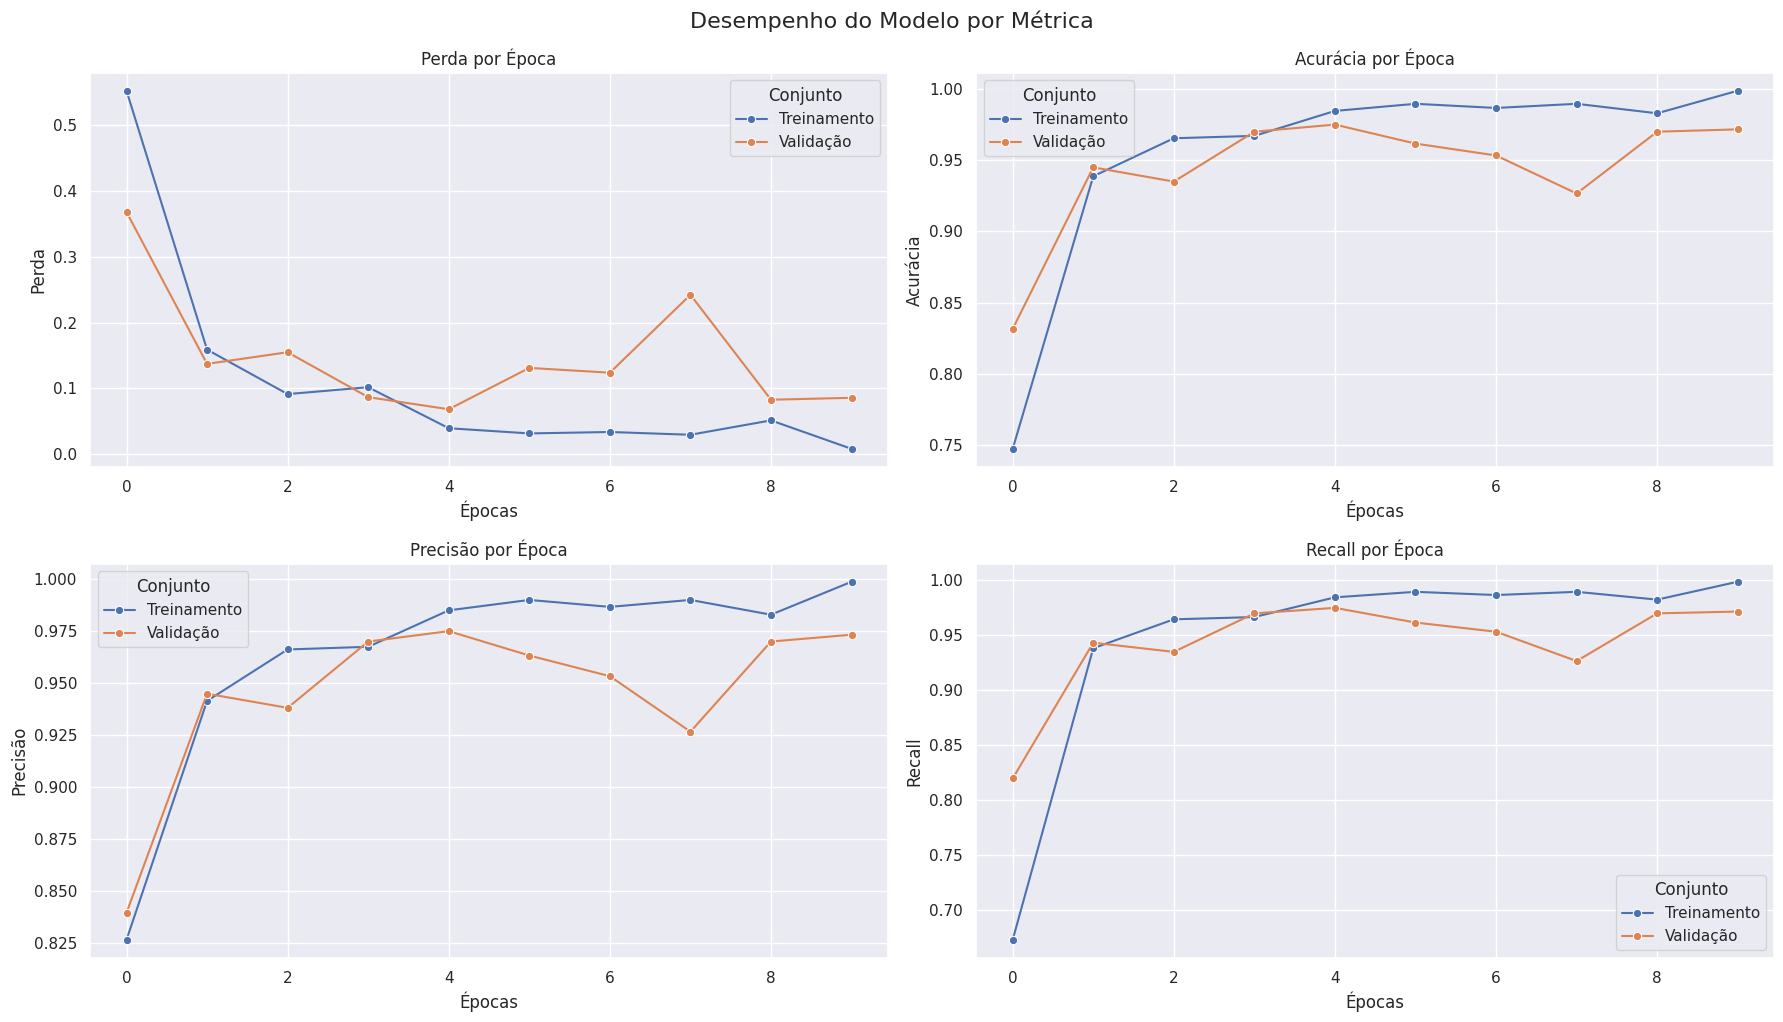

In [ ]:
# Evaluating the model
plot_all_metrics(history_1)

(np.float64(-0.5), np.float64(849.5), np.float64(829.5), np.float64(-0.5))

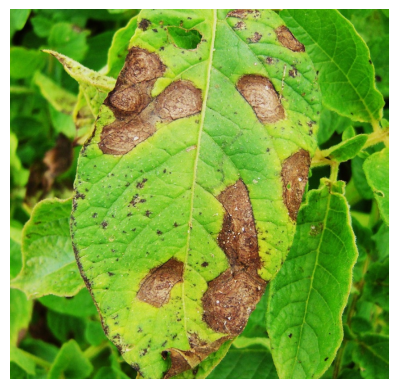

In [ ]:
# !wget https://agriq.com.br/wp-content/uploads/2023/06/Blog-AgriQ_Requeima-da-batata_Creditos-Vegetable-Growers-News.jpeg

img_path = "img.jpg"
new_img = mpimg.imread(img_path)
plt.imshow(new_img)
plt.axis("off")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


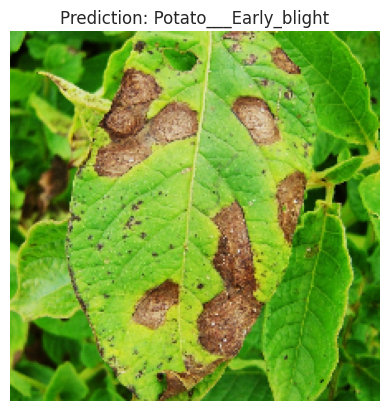

In [ ]:
# Predict the class
pred_and_plot(model_1, img_path, class_names)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_434']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


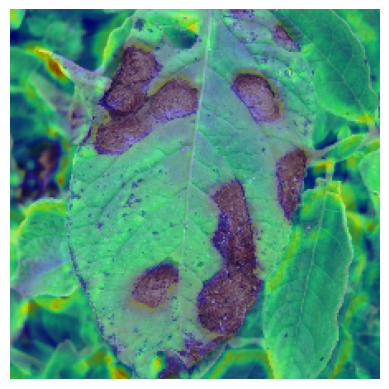

In [ ]:
img_tensor = load_and_prep_image(img_path)
img_batch = tf.expand_dims(img_tensor, axis=0)

heatmap = make_gradcam_heatmap(img_batch, model_1)
save_and_display_gradcam(img_tensor, heatmap)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


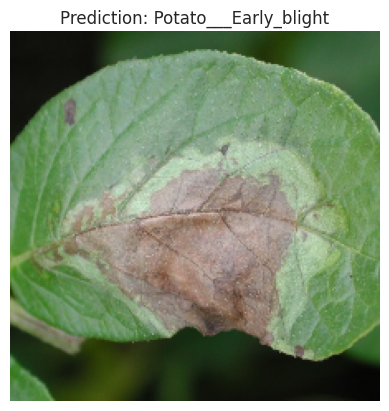

In [ ]:
img_path_2 = "img-2.jpg"
pred_and_plot(model_1, img_path_2, class_names)

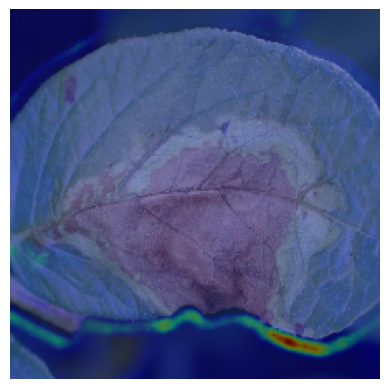

In [ ]:
img_tensor_2 = load_and_prep_image(img_path_2)
img_batch_2 = tf.expand_dims(img_tensor_2, axis=0)

heatmap_2 = make_gradcam_heatmap(img_batch_2, model_1)
save_and_display_gradcam(img_tensor_2, heatmap_2)

## 🧠 Model 2: Inception-V3 Based

This model used as a baseline an adaptation of Inception-V3 proposed by Toda and Okura, but was simplified.

> **How Convolutional Neural Networks Diagnose Plant Disease (TODA; OKURA, 2019)**
Paper original: https://spj.science.org/doi/full/10.34133/2019/9237136

In [ ]:
def conv_bn(x, filters, kernel_size, strides=1, padding='same', name=None):
    x = Conv2D(filters, kernel_size, strides=strides, padding=padding, use_bias=False, name=f"{name}_conv")(x)
    x = BatchNormalization(name=f"{name}_bn")(x)
    x = Activation('relu', name=f"{name}_act")(x)
    return x

def inception_v3_style_block(x, f1, f3r, f3, f5r, f5, proj, name_prefix="0"):
    # Path 1: 1x1 conv
    path1 = conv_bn(x, f1, (1, 1), name=f"block_{name_prefix}_1x1")

    # Path 2: 1x1 → 1x3 → 3x1 (factorized 3x3)
    path2 = conv_bn(x, f3r, (1, 1), name=f"block_{name_prefix}_3x3_reduce")
    path2 = conv_bn(path2, f3, (1, 3), name=f"block_{name_prefix}_3x3_a")
    path2 = conv_bn(path2, f3, (3, 1), name=f"block_{name_prefix}_3x3_b")

    # Path 3: 1x1 → 1x3 → 3x1 → 1x3 → 3x1 (factorized 5x5)
    path3 = conv_bn(x, f5r, (1, 1), name=f"block_{name_prefix}_5x5_reduce")
    path3 = conv_bn(path3, f5, (1, 3), name=f"block_{name_prefix}_5x5_a1")
    path3 = conv_bn(path3, f5, (3, 1), name=f"block_{name_prefix}_5x5_b1")
    path3 = conv_bn(path3, f5, (1, 3), name=f"block_{name_prefix}_5x5_a2")
    path3 = conv_bn(path3, f5, (3, 1), name=f"block_{name_prefix}_5x5_b2")

    # Path 4: 3x3 max pooling → 1x1 conv
    path4 = MaxPooling2D(pool_size=(3, 3), strides=1, padding='same', name=f"block_{name_prefix}_pool")(x)
    path4 = conv_bn(path4, proj, (1, 1), name=f"block_{name_prefix}_pool_proj")

    # Concatenate all paths
    return Concatenate(axis=-1, name=f"mixed_{name_prefix}")([path1, path2, path3, path4])

# Input
input_layer = Input(shape=(224, 224, 3), name="input")
x = input_layer

# Initial block (as in the diagram)
x = conv_bn(x, 32, (3, 3), strides=2, padding='valid', name="conv1")   # 111x111
x = conv_bn(x, 32, (3, 3), padding='valid', name="conv2")              # 109x109
x = conv_bn(x, 64, (3, 3), padding='same', name="conv3")               # 109x109
x = MaxPooling2D(pool_size=(2, 2), strides=2, name="maxpool_1")(x)     # 54x54

x = conv_bn(x, 80, (1, 1), padding='same', name="conv4")               # 54x54
x = conv_bn(x, 192, (3, 3), padding='valid', name="conv5")             # 52x52
x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='valid', name="maxpool_2")(x)  # 25x25

# Custom Inception blocks x6
for i in range(6):
    x = inception_v3_style_block(
        x,
        f1=64, f3r=32, f3=64,
        f5r=16, f5=96,
        proj=32,
        name_prefix=f"{i}"
    )

# Final layers
x = GlobalAveragePooling2D(name="global_avg_pool")(x)
output_layer = Dense(3, activation='softmax', name="output")(x)

# Model
model_2 = Model(inputs=input_layer, outputs=output_layer)
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'precision', 'recall'])

In [ ]:
model_2.summary()

Model: "functional_24"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)  │ (None, 224, 224,  │          0 │ -                 │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 111, 111,  │        864 │ input[0][0]       │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 111, 111,  │        128 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_act           │ (None, 111, 111,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_conv (Conv2D) │ (None, 109, 109,  │      9,216 │ conv1_act[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_bn            │ (None, 109, 109,  │        128 │ conv2_conv[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_act           │ (None, 109, 109,  │          0 │ conv2_bn[0][0]    │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3_conv (Conv2D) │ (None, 109, 109,  │     18,432 │ conv2_act[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3_bn            │ (None, 109, 109,  │        256 │ conv3_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3_act           │ (None, 109, 109,  │          0 │ conv3_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool_1           │ (None, 54, 54,    │          0 │ conv3_act[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv4_conv (Conv2D) │ (None, 54, 54,    │      5,120 │ maxpool_1[0][0]   │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv4_bn            │ (None, 54, 54,    │        320 │ conv4_conv[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv4_act           │ (None, 54, 54,    │          0 │ conv4_bn[0][0]    │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv5_conv (Conv2D) │ (None, 52, 52,    │    138,240 │ conv4_act[0][0]   │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv5_bn            │ (None, 52, 52,    │        768 │ conv5_conv[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv5_act           │ (None, 52, 52,    │          0 │ conv5_bn[0][0]  

 Total params: 1,037,859 (3.96 MB)

 Trainable params: 1,029,187 (3.93 MB)

 Non-trainable params: 8,672 (33.88 KB)

In [ ]:
history_2 = model_2.fit(
    train_data, epochs=10,
    steps_per_epoch=len(train_data),
    validation_data=val_data,
    validation_steps=(len(val_data)),
    callbacks=[early_stopping, reduce_lr]
    )

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 69s 259ms/step - accuracy: 0.8382 - loss: 0.3834 - precision: 0.8785 - recall: 0.7727 - val_accuracy: 0.3383 - val_loss: 2.8293 - val_precision: 0.3383 - val_recall: 0.3383 - learning_rate: 0.0010
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 156ms/step - accuracy: 0.9602 - loss: 0.1145 - precision: 0.9608 - recall: 0.9587 - val_accuracy: 0.4233 - val_loss: 5.0372 - val_precision: 0.4233 - val_recall: 0.4233 - learning_rate: 0.0010
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 156ms/step - accuracy: 0.9605 - loss: 0.1115 - precision: 0.9628 - recall: 0.9591 - val_accuracy: 0.5333 - val_loss: 4.4426 - val_precision: 0.5333 - val_recall: 0.5333 - learning_rate: 0.0010
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 22s 171ms/step - accuracy: 0.9763 - loss: 0.0699 - precision: 0.9763 - recall: 0.9759 - val_accuracy: 0.6017 - val_loss: 1.9222 - val_precision: 0.6017 - val_recall: 0.6017 - learning_rate: 0.0010
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 170ms/step - accur

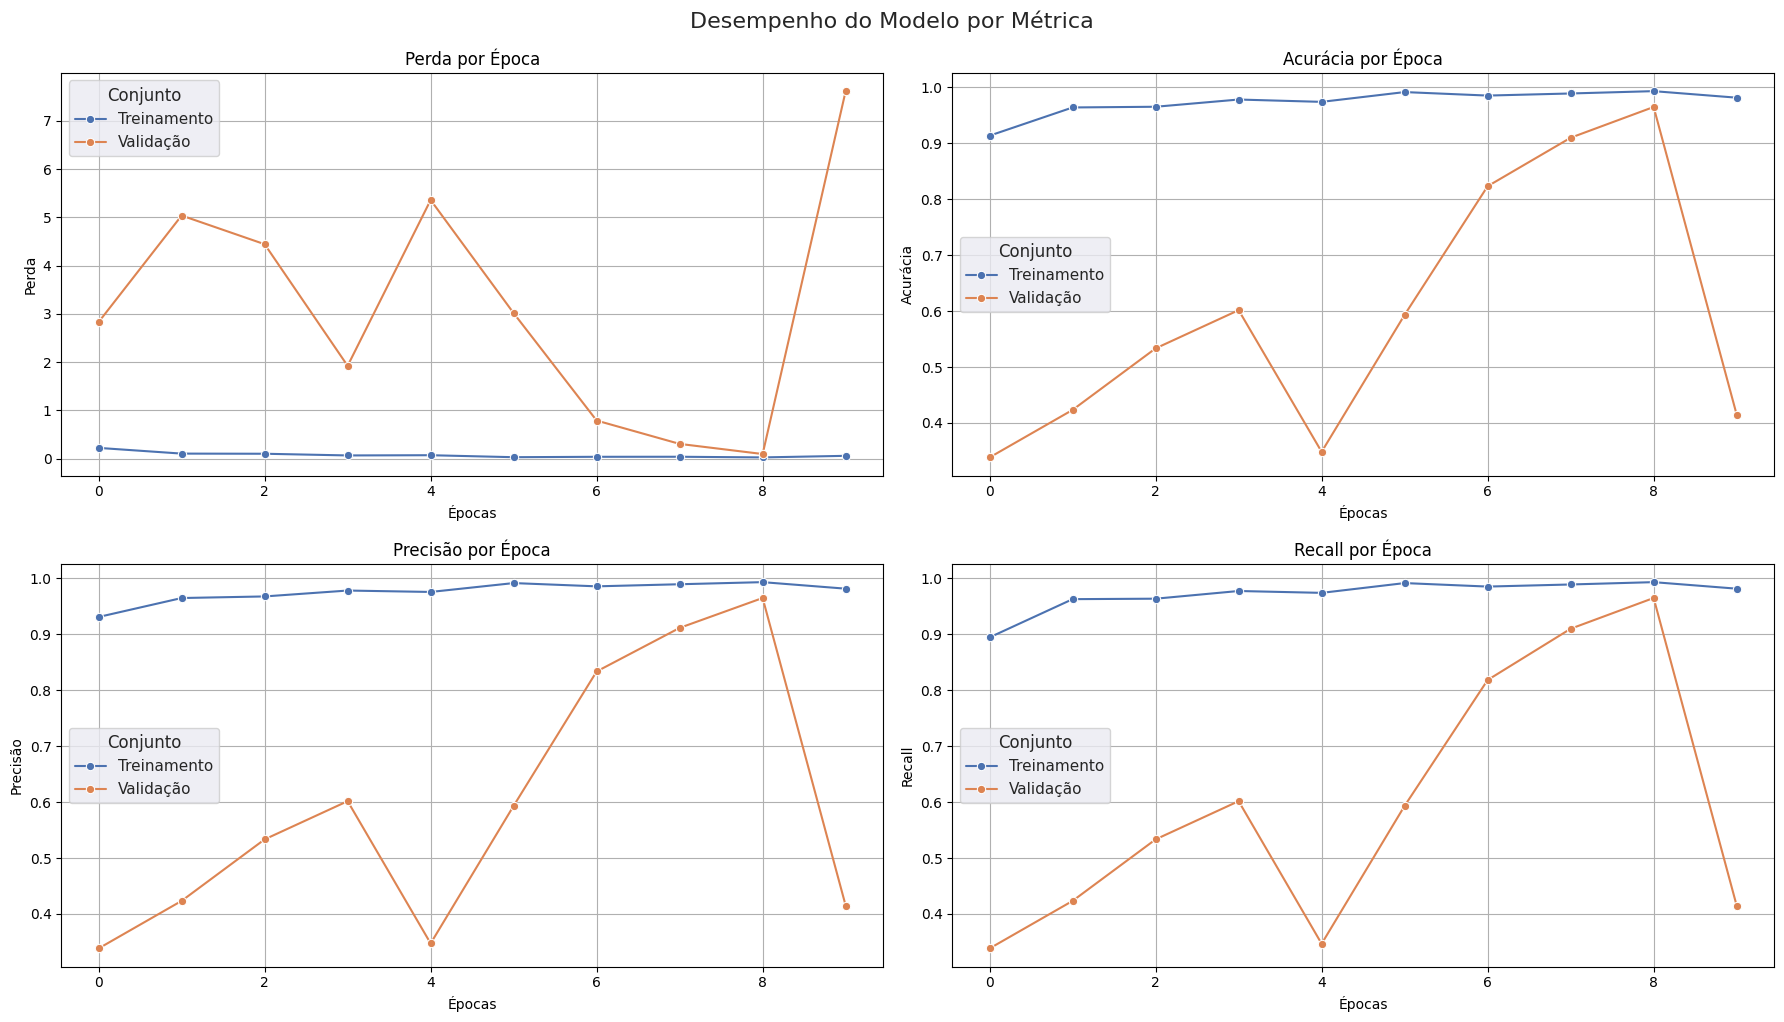

In [ ]:
plot_all_metrics(history_2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


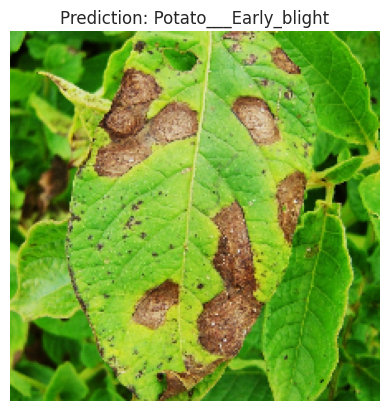

In [ ]:
img_path = "img.jpg"
pred_and_plot(model_2, img_path, class_names)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


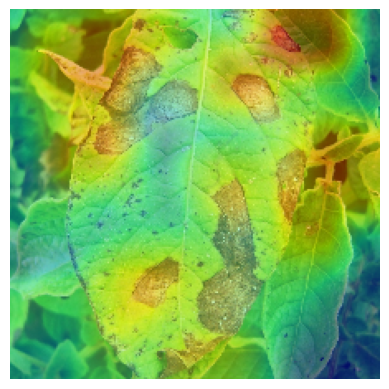

In [ ]:
img_tensor_3 = load_and_prep_image(img_path)
img_batch_3 = tf.expand_dims(img_tensor_3, axis=0)

heatmap = make_gradcam_heatmap(img_batch_3, model_2)
save_and_display_gradcam(img_tensor_3, heatmap)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


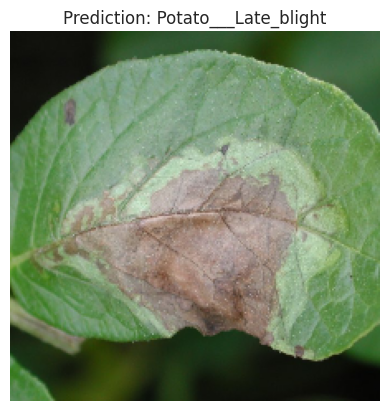

In [ ]:
img_path_2 = "img-2.jpg"
pred_and_plot(model_2, img_path_2, class_names)

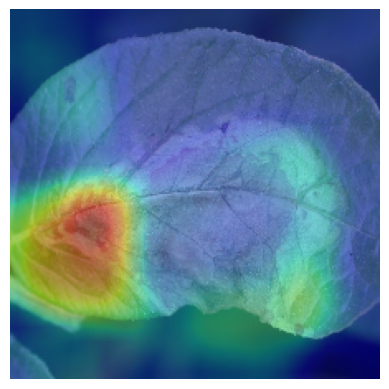

In [ ]:
img_tensor_4 = load_and_prep_image(img_path_2)
img_batch_4 = tf.expand_dims(img_tensor_4, axis=0)

heatmap = make_gradcam_heatmap(img_batch_4, model_2)
save_and_display_gradcam(img_tensor_4, heatmap)

## 💬 Discussion

